In [1]:
using QuadraticTeamDecisionSolver, Distributions, Statistics, LinearAlgebra, Plots, LaTeXStrings
gr()

Plots.GRBackend()

In [2]:
#replace with desired directory
saveTo = "/home/santos/Desktop/thesis-plots";
dpi=1000;

### Problem Specification

In [3]:
N = K = 2;
L = 1
P = 0.5; 
omega = 1.1;
σₕ = 1.0;
σₙ = σₕ/10;
ϵ = 0.4;

p = QuadTeamProblem(N, N * K * L * ones(Int64, N), L*ones(Int64, N), ComplexF64);
t = teamMMSEproblem(
	P,
	N,
	L,
	K,
	σₕ * ones(Float64, N),
	σₙ * ones(Float64, N),
	ϵ * ones(Float64, N)
);

In [4]:
p = checkProblem(p)

QuadTeamProblem{ComplexF64}(2, [4, 4], [1, 1], ComplexF64)

### Data Sets

In [5]:
m_test = 2000;
Y_test, Q_test, R_test = generateTeamMMSEsamples(t, m_test);

In [12]:
using Plots.PlotMeasures

In [20]:
h11 = histogram2d([y[1] for y in Y_test[1]], colorbar=false, title=L"\mathbf{Y}_1[1,1]");
h12 = histogram2d([y[2] for y in Y_test[1]], colorbar=false, title=L"\mathbf{Y}_1[2,1]");
h13 = histogram2d([y[3] for y in Y_test[1]], colorbar=false, title=L"\mathbf{Y}_1[1,2]");
h14 = histogram2d([y[4] for y in Y_test[1]], colorbar=false, title=L"\mathbf{Y}_1[2,2]");
h21 = histogram2d([y[1] for y in Y_test[2]], colorbar=false, title=L"\mathbf{Y}_2[1,1]");
h22 = histogram2d([y[2] for y in Y_test[2]], colorbar=false, title=L"\mathbf{Y}_2[2,1]");
h23 = histogram2d([y[3] for y in Y_test[2]], colorbar=false, title=L"\mathbf{Y}_2[1,2]");
h24 = histogram2d([y[4] for y in Y_test[2]], colorbar=false, title=L"\mathbf{Y}_2[2,2]");
plot(h11, h13, h21, h23, h12, h14, h22, h24, layout=(2,4), size=(1400,700), dpi=dpi, left_margin=20px , bottom_margin=20px, top_margin=20px)
savefig(saveTo * "/Y-histograms-2-agents.png")
display(Plots.current())

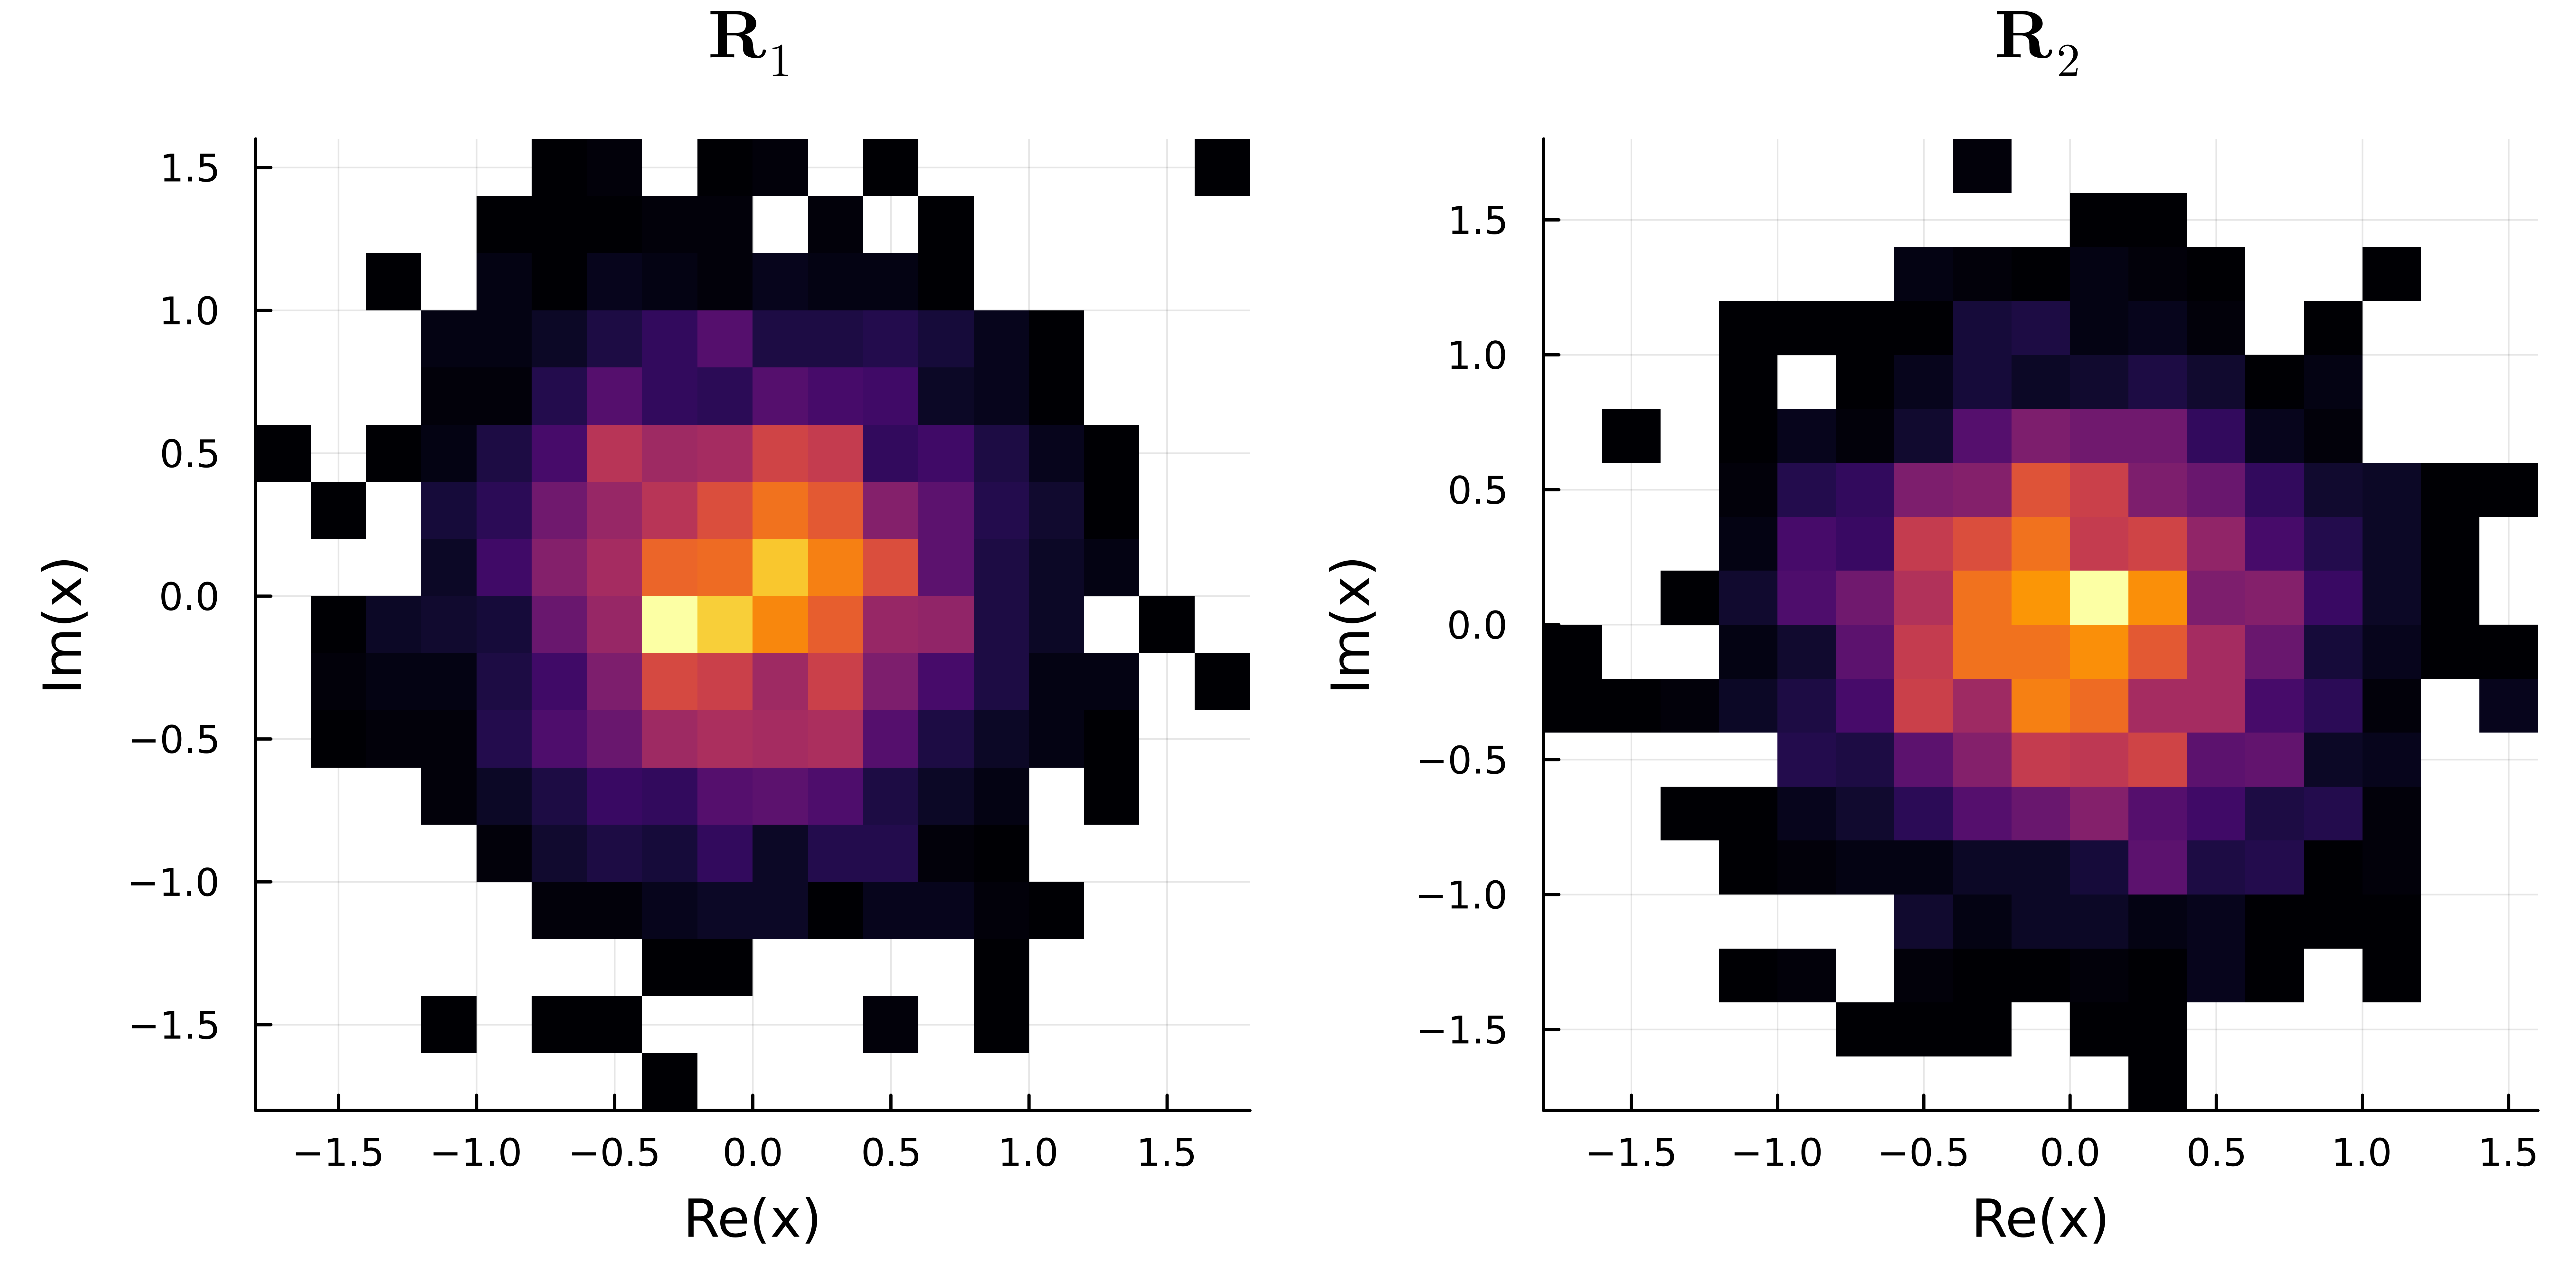

In [18]:
h1 = histogram2d(vcat(R_test[1]...), colorbar=false, title=L"\mathbf{R}_1");
h2 = histogram2d(vcat(R_test[2]...), colorbar=false, title=L"\mathbf{R}_2");
plot(h1, h2, size=(800, 400), dpi=dpi, left_margin=20px , bottom_margin=20px, top_margin=20px)
savefig(saveTo * "/R-histograms-2-agents.png")
display(Plots.current())

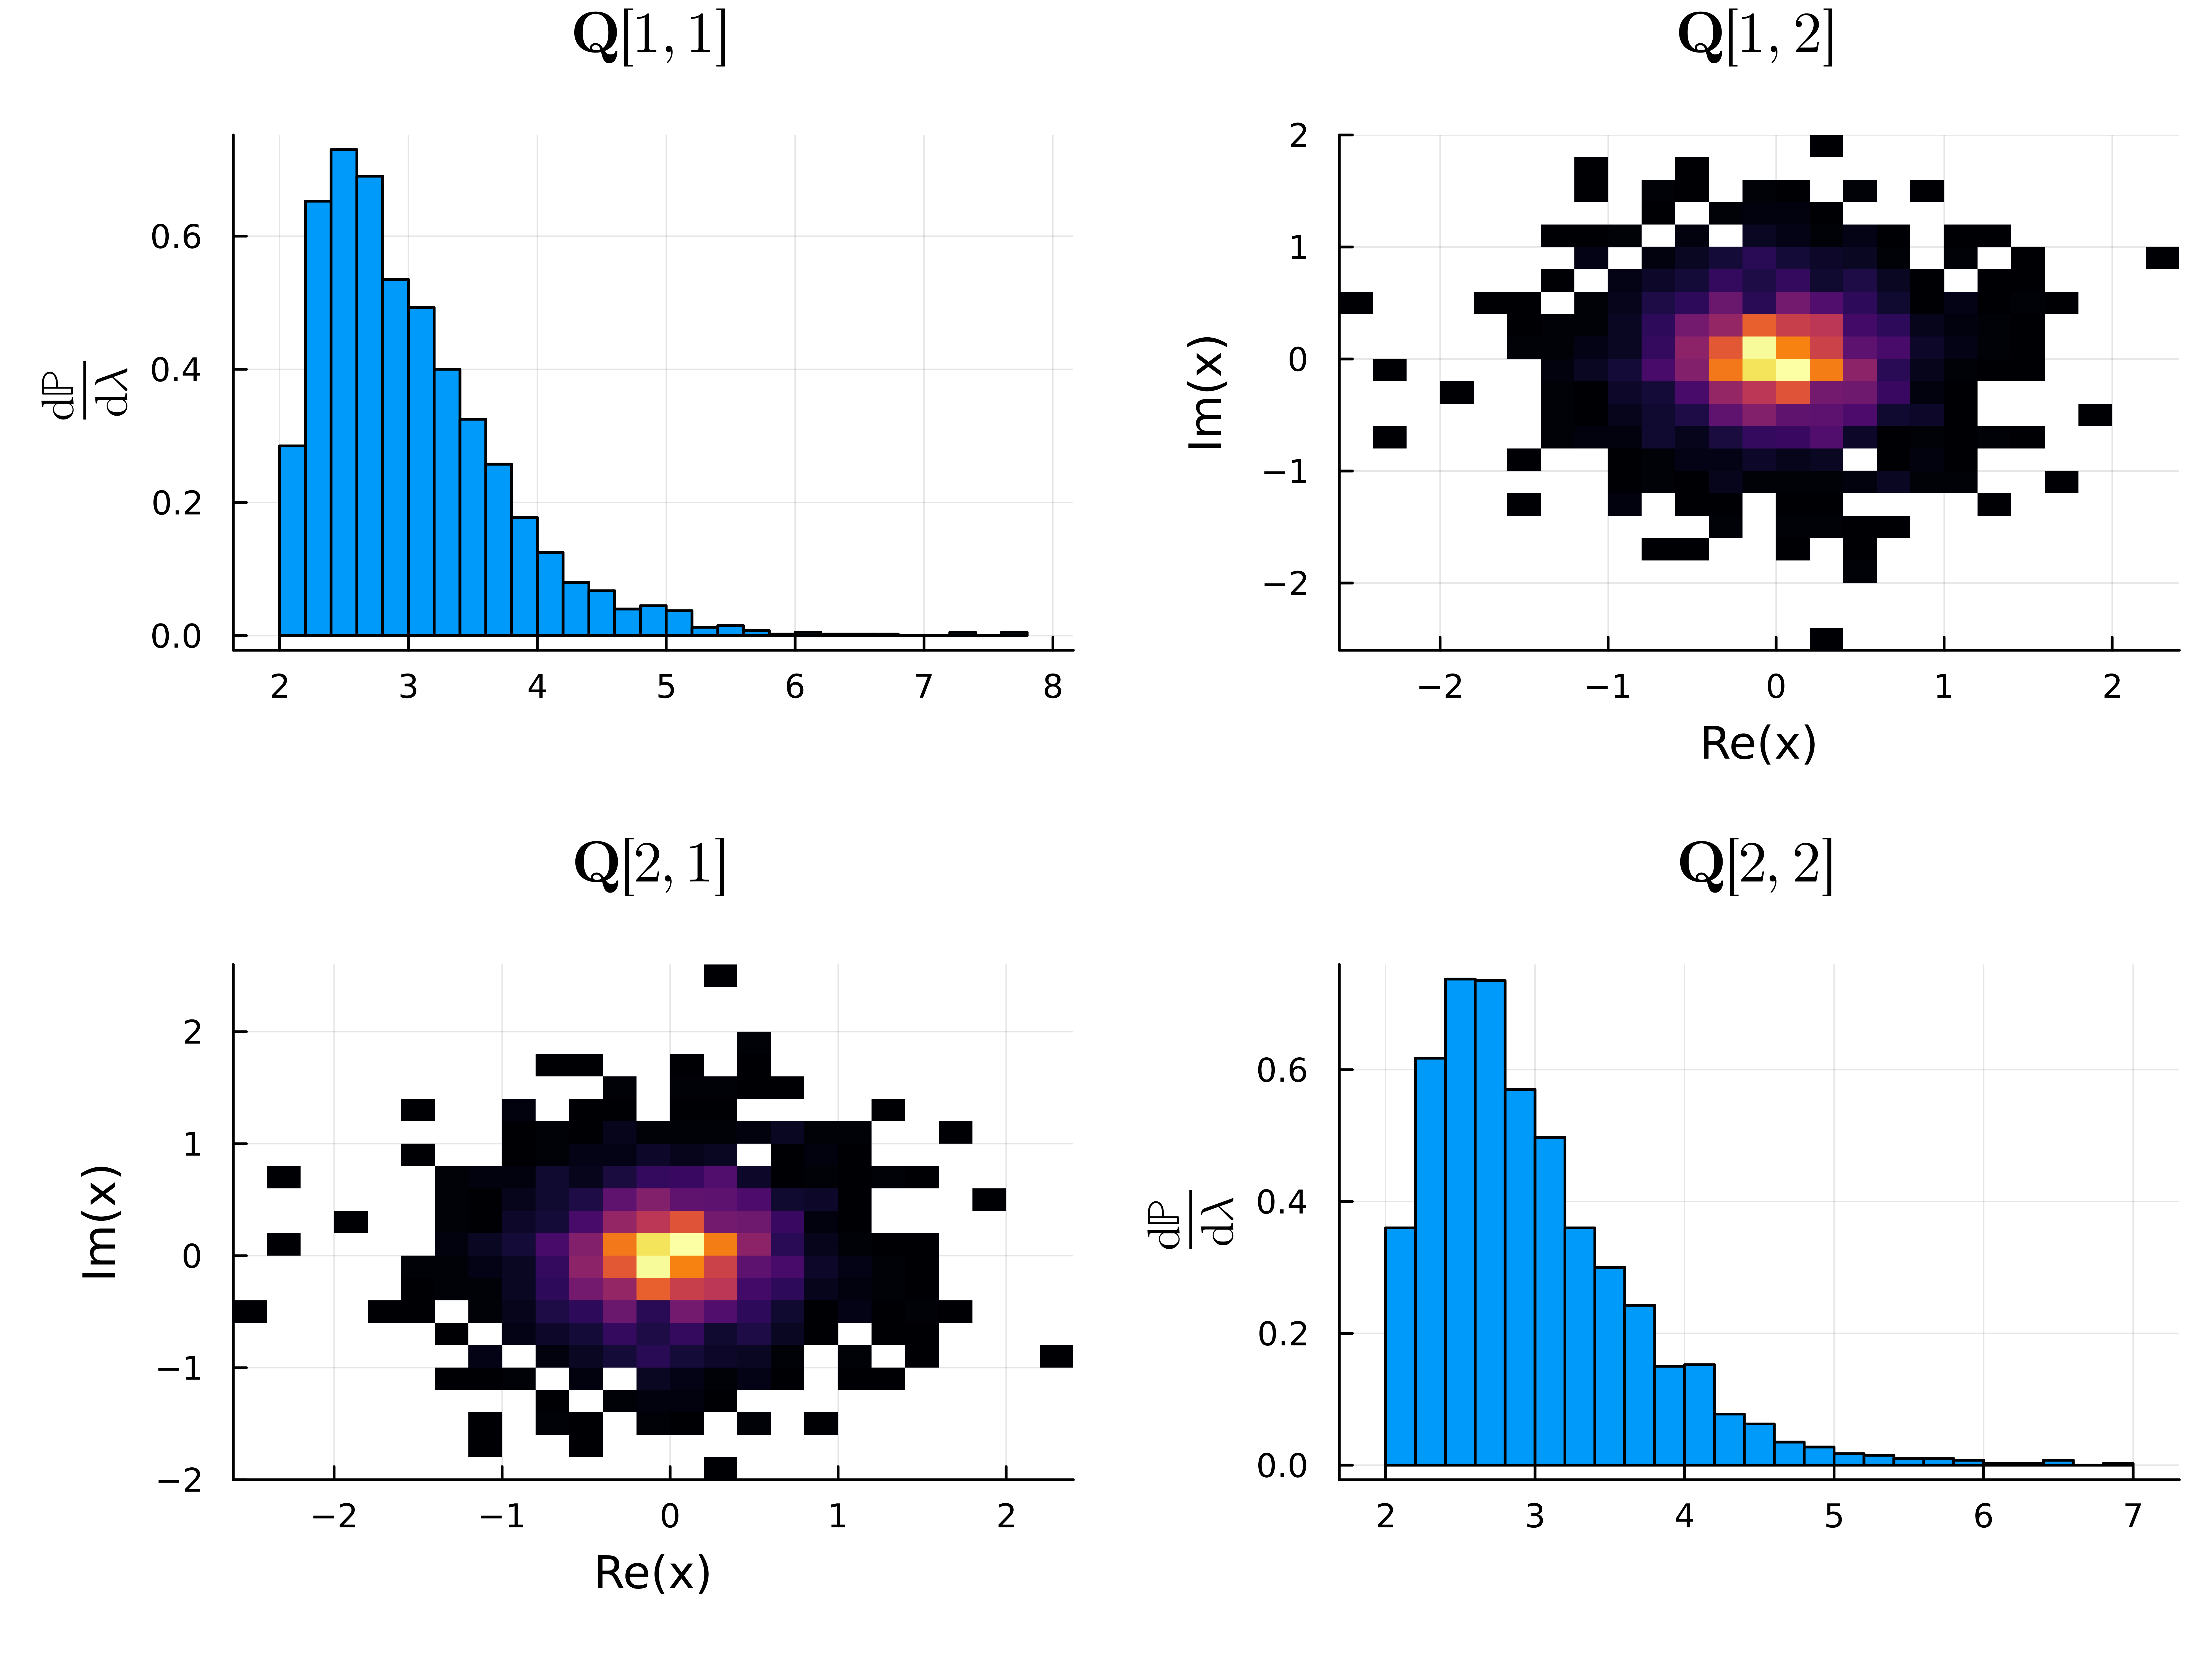

In [27]:
h11 = histogram(real(vcat(Q_test[1,1]...)), colorbar=false, normalize=true, title=L"\mathbf{Q}[1,1]", label=:none, ylabel=L"\frac{\mathrm{d}\mathbb{P}}{\mathrm{d}\lambda}");
h12 = histogram2d(vec(vcat(Q_test[1,2]...)), colorbar=false, title=L"\mathbf{Q}[1,2]");
h21 = histogram2d(vec(vcat(Q_test[2,1]...)), colorbar=false, title=L"\mathbf{Q}[2,1]");
h22 = histogram(real(vcat(Q_test[2,2]...)), colorbar=false, normalize=true, title=L"\mathbf{Q}[2,2]", label=:none, ylabel=L"\frac{\mathrm{d}\mathbb{P}}{\mathrm{d}\lambda}");
plot(h11, h12, h21, h22, size=(800, 600), dpi=dpi, left_margin=20px , bottom_margin=20px, top_margin=20px)
savefig(saveTo * "/Q-histograms-2-agents.png")
display(Plots.current())

In [9]:
Q_eigvals = hcat.(vcat.(Q_test[1,1], Q_test[2,1]), vcat.(Q_test[1,2], Q_test[2,2]));
Q_eigvals_total = hcat(real.(eigvals.(Q_eigvals))...);
min_Q_eigvals = Q_eigvals .|> x -> minimum(real.(eigvals(x)));
max_T_eigvals = (Q_eigvals .|> x -> x - (1/P)I) .|> x -> maximum(real.(eigvals(x)));

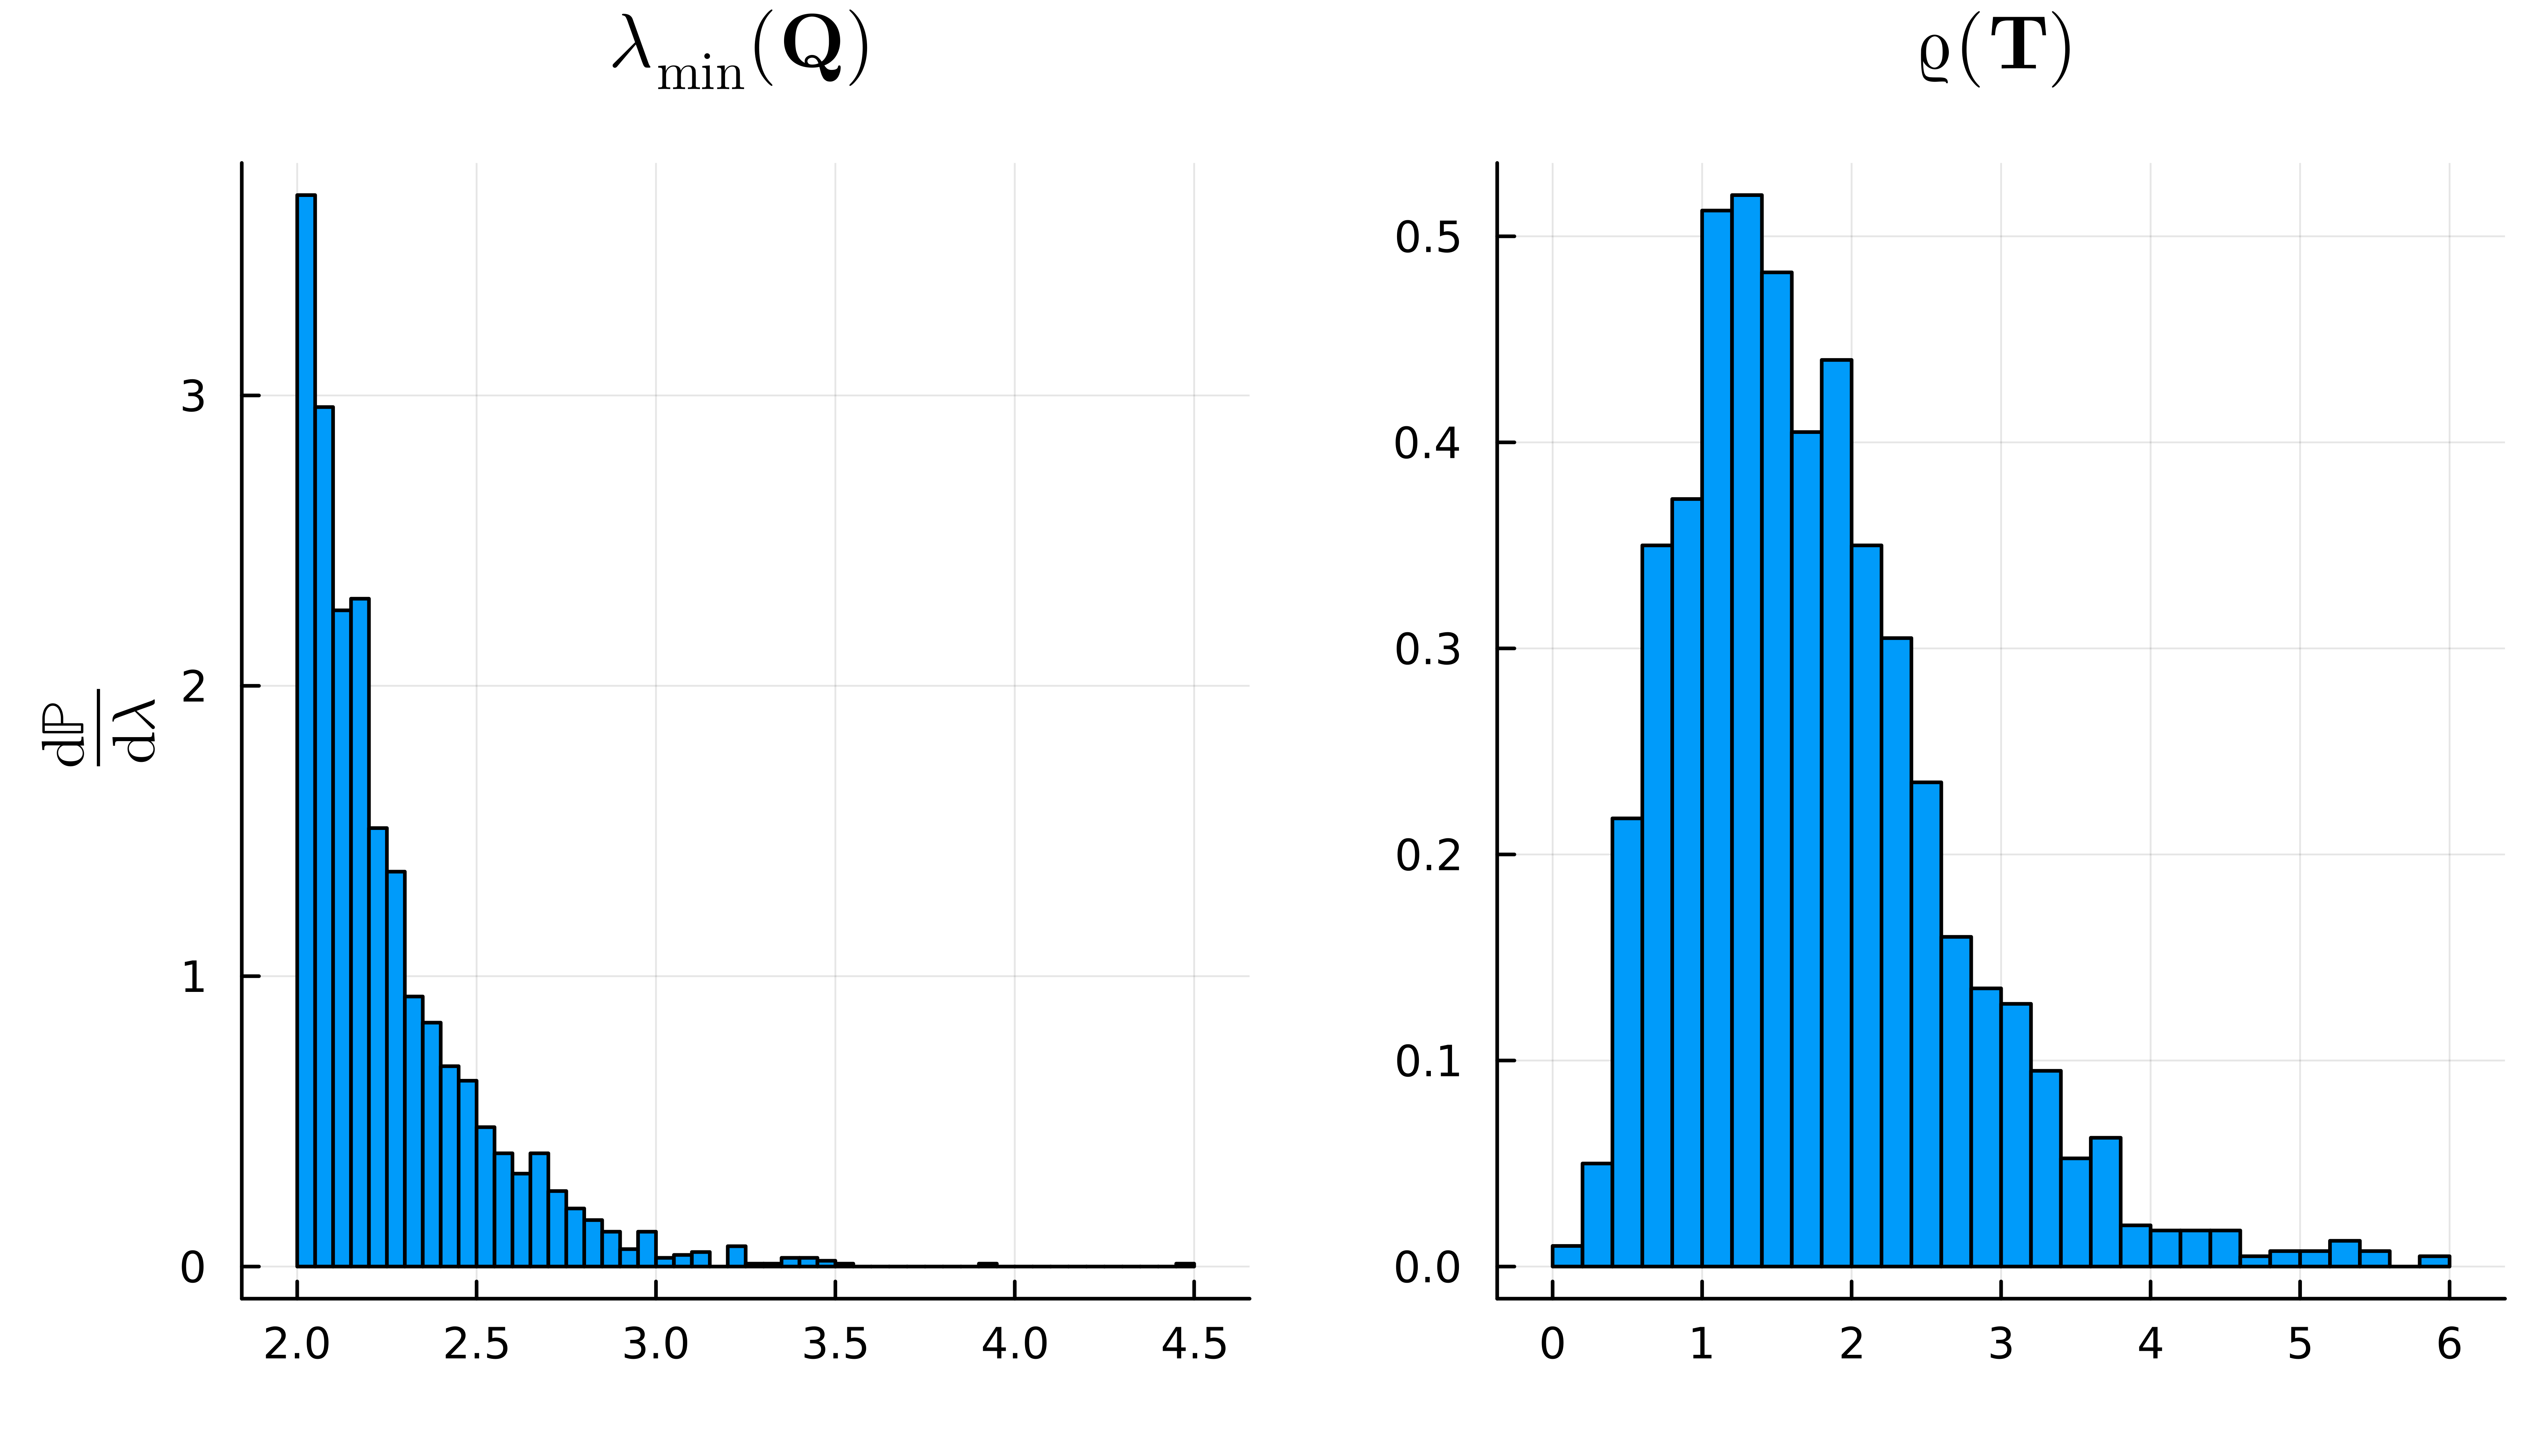

In [30]:
h1 = histogram(min_Q_eigvals, title=L"\lambda_{\mathrm{min}}(\mathbf{Q})", label=:none, ylabel=L"\frac{\mathrm{d}\mathbb{P}}{\mathrm{d}\lambda}", normalize=true);
h2 = histogram(max_T_eigvals, title=L"\varrho(\mathbf{T})", label=:none, normalize=true);
plot(h1, h2, size=(700,400), dpi=dpi, left_margin=20px , bottom_margin=20px, top_margin=20px)
savefig(saveTo * "/Q-eigvals-histograms-2-agents.png")
display(Plots.current())